In [11]:
# API Libraries
from retry_requests import retry
import requests 
import requests_cache
import openmeteo_requests
from sodapy import Socrata

# Data Analysis and Preprocessing.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder



# Section 0.1: Data Preprocessing and EDA onto the following datatsets:

 1) Yellow_taxi
 2) Taxi_zones
 3) Weather
 4) Traffic.

# 1)  Section 0.1: Yellow_TAXI DataFrame.

In [2]:
# Create a function that create a uniform format for the yellow taxi dataframes.
def fun(df,df_1):
    for i in range(len(df.columns.tolist())):
        for j in range(len(df_1.columns.tolist())):
            if i==j and df.columns.tolist()[i]!=df_1.columns.tolist()[j]:
                df_1.rename(columns={df_1.columns.tolist()[j]:df.columns.tolist()[i]}, inplace=True)

def concat_all_yellow_taxi_df(paths):
    df=pd.read_parquet(paths[0])
    df=df.sample(frac=0.2)
    for i in range(len(paths)):
        if i>0:
            df_aux=pd.read_parquet(paths[i])
            df_aux=df_aux.sample(frac=0.2)
            fun(df,df_aux)
            df=pd.concat([df,df_aux])
            del df_aux
    return df


In [3]:
# Change the paths to the correct paths in your computer.
paths=[
    'C:\\Users\\aleja\\Downloads\\AI_engineer_proyects\\Proyecto_Final\\Data\\Yellow_Taxi_2023\\yellow_tripdata_2023-01.parquet',
    'C:\\Users\\aleja\\Downloads\\AI_engineer_proyects\\Proyecto_Final\\Data\\Yellow_Taxi_2023\\yellow_tripdata_2023-02.parquet',
    'C:\\Users\\aleja\\Downloads\\AI_engineer_proyects\\Proyecto_Final\\Data\\Yellow_Taxi_2023\\yellow_tripdata_2023-03.parquet',
    'C:\\Users\\aleja\\Downloads\\AI_engineer_proyects\\Proyecto_Final\\Data\\Yellow_Taxi_2023\\yellow_tripdata_2023-04.parquet',
    'C:\\Users\\aleja\\Downloads\\AI_engineer_proyects\\Proyecto_Final\\Data\\Yellow_Taxi_2023\\yellow_tripdata_2023-05.parquet',
    'C:\\Users\\aleja\\Downloads\\AI_engineer_proyects\\Proyecto_Final\\Data\\Yellow_Taxi_2023\\yellow_tripdata_2023-06.parquet',
    'C:\\Users\\aleja\\Downloads\\AI_engineer_proyects\\Proyecto_Final\\Data\\Yellow_Taxi_2023\\yellow_tripdata_2023-07.parquet',
    'C:\\Users\\aleja\\Downloads\\AI_engineer_proyects\\Proyecto_Final\\Data\\Yellow_Taxi_2023\\yellow_tripdata_2023-08.parquet',
    'C:\\Users\\aleja\\Downloads\\AI_engineer_proyects\\Proyecto_Final\\Data\\Yellow_Taxi_2023\\yellow_tripdata_2023-09.parquet',
    'C:\\Users\\aleja\\Downloads\\AI_engineer_proyects\\Proyecto_Final\\Data\\Yellow_Taxi_2023\\yellow_tripdata_2023-10.parquet',
    'C:\\Users\\aleja\\Downloads\\AI_engineer_proyects\\Proyecto_Final\\Data\\Yellow_Taxi_2023\\yellow_tripdata_2023-11.parquet',
    'C:\\Users\\aleja\\Downloads\\AI_engineer_proyects\\Proyecto_Final\\Data\\Yellow_Taxi_2023\\yellow_tripdata_2023-12.parquet'
]

In [4]:
# libraries to work with parquet files.
%pip install pyarrow
%pip install fastparquet


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aleja\Downloads\AI_engineer_proyects\Proyecto_Final\env\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aleja\Downloads\AI_engineer_proyects\Proyecto_Final\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
# read the concatenated yellow taxi dataframe.
import gc

taxi_df = concat_all_yellow_taxi_df(paths)
taxi_df.head()

# Optimize the Dataframe memeory usage
def optimize_dtypes(df):
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object and not np.issubdtype(col_type, np.datetime64) and not pd.api.types.is_categorical_dtype(col_type):
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif np.issubdtype(col_type, np.datetime64):
            df[col] = pd.to_datetime(df[col])
        elif pd.api.types.is_categorical_dtype(col_type):
            df[col] = df[col].astype('category')
        else:
            df[col] = df[col].astype('category')
    return df

# Apply the optimization function to the DataFrame
taxi_df_optimized = optimize_dtypes(taxi_df)

# Clean the cache

gc.collect()

taxi_df_optimized.head()

# Analyze the optimized DataFrame Memory Usage
optimized_memory_usage = taxi_df_optimized.memory_usage(deep=True)
optimized_memory_usage_per_column = optimized_memory_usage / (1024 ** 2)  # Convert bytes to megabytes
optimized_total_memory_usage = optimized_memory_usage_per_column.sum()

# Display optimized memory usage per column and total memory usage
optimized_memory_usage_per_column, optimized_total_memory_usage

C:\Users\aleja\AppData\Local\Temp\ipykernel_27932\678863989.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if col_type != object and not np.issubdtype(col_type, np.datetime64) and not pd.api.types.is_categorical_dtype(col_type):
C:\Users\aleja\AppData\Local\Temp\ipykernel_27932\678863989.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if col_type != object and not np.issubdtype(col_type, np.datetime64) and not pd.api.types.is_categorical_dtype(col_type):
C:\Users\aleja\AppData\Local\Temp\ipykernel_27932\678863989.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if col_type != object and not np.issubdtype(col_type, np.datetime64) and not pd.api.types.is_categorical_dty

(Index                    58.456764
 VendorID                  7.307096
 tpep_pickup_datetime     58.456764
 tpep_dropoff_datetime    58.456764
 passenger_count          14.614191
 trip_distance            29.228382
 RatecodeID               14.614191
 store_and_fwd_flag        7.307309
 PULocationID             14.614191
 DOLocationID             14.614191
 payment_type              7.307096
 fare_amount              29.228382
 extra                    14.614191
 mta_tax                  14.614191
 tip_amount               14.614191
 tolls_amount             14.614191
 improvement_surcharge    14.614191
 total_amount             29.228382
 congestion_surcharge     14.614191
 airport_fee              14.614191
 dtype: float64,
 np.float64(445.73304080963135))

In [134]:
memory_usage = taxi_df.memory_usage(deep=True)
memory_usage_per_column = memory_usage / (1024 ** 2)  # Convert bytes to megabytes
total_memory_usage = memory_usage_per_column.sum()

# Display memory usage per column and total memory usage
memory_usage_per_column, total_memory_usage

(Index                    116.913536
 VendorID                  14.614192
 tpep_pickup_datetime     116.913536
 tpep_dropoff_datetime    116.913536
 passenger_count           29.228384
 trip_distance             58.456768
 RatecodeID                29.228384
 store_and_fwd_flag        14.614406
 PULocationID              29.228384
 DOLocationID              29.228384
 payment_type              14.614192
 fare_amount               58.456768
 extra                     29.228384
 mta_tax                   29.228384
 tip_amount                29.228384
 tolls_amount              29.228384
 improvement_surcharge     29.228384
 total_amount              58.456768
 congestion_surcharge      29.228384
 airport_fee               29.228384
 dtype: float64,
 np.float64(891.4659261703491))

In [5]:
#The shape of the concatenated yellow taxi datasframe.
print("The dim of the sample space is:",taxi_df_optimized.shape[0], "rows \n &  \n  the dim of the column space is:",taxi_df_optimized.shape[1], "columns")

The dim of the sample space is: 7662045 rows 
 &  
  the dim of the column space is: 19 columns


In [6]:
batched_taxi_df=taxi_df_optimized.sample(frac=0.85)

In [7]:
print(f' the shape of the data batch is:= {batched_taxi_df.shape} \n')

print(f'{batched_taxi_df.head()} \n')


 the shape of the data batch is:= (6512738, 19) 

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1193026         2  2023-05-11 18:04:47   2023-05-11 18:27:05              1.0   
1018181         1  2023-03-10 12:51:46   2023-03-10 13:11:46              1.0   
1402236         2  2023-04-14 16:01:33   2023-04-14 16:09:09              1.0   
1492041         2  2023-07-18 12:31:33   2023-07-18 13:38:53              1.0   
3321504         2  2023-05-31 10:12:51   2023-05-31 10:18:15              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1193026           2.71         1.0                  N            68   
1018181           2.50         1.0                  N           107   
1402236           1.09         1.0                  N           164   
1492041           9.12         1.0                  N            13   
3321504           0.60         1.0                  N           236   

         DOLocationID  payment_type 

c:\Users\aleja\Downloads\AI_engineer_proyects\Proyecto_Final\env\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


In [8]:
print(f'{batched_taxi_df.info()}')

<class 'pandas.core.frame.DataFrame'>
Index: 6512738 entries, 1193026 to 172787
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int8          
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float16       
 4   trip_distance          float32       
 5   RatecodeID             float16       
 6   store_and_fwd_flag     category      
 7   PULocationID           int16         
 8   DOLocationID           int16         
 9   payment_type           int8          
 10  fare_amount            float32       
 11  extra                  float16       
 12  mta_tax                float16       
 13  tip_amount             float16       
 14  tolls_amount           float16       
 15  improvement_surcharge  float16       
 16  total_amount           float32       
 17  congestion_surcharge   float16       
 18  airport_fee           

In [9]:
# Feature engineering: 
batched_taxi_df['h']=batched_taxi_df['tpep_pickup_datetime'].dt.hour.astype('int64')
batched_taxi_df['day_of_week']=batched_taxi_df['tpep_pickup_datetime'].dt.day_of_week.astype('int8')
batched_taxi_df['m']=batched_taxi_df['tpep_pickup_datetime'].dt.month.astype('int8')
batched_taxi_df['trip_duration']=((batched_taxi_df['tpep_dropoff_datetime']-batched_taxi_df['tpep_pickup_datetime']).dt.seconds/60).astype('int16')


In [10]:
batched_taxi_df.shape

(6512738, 23)

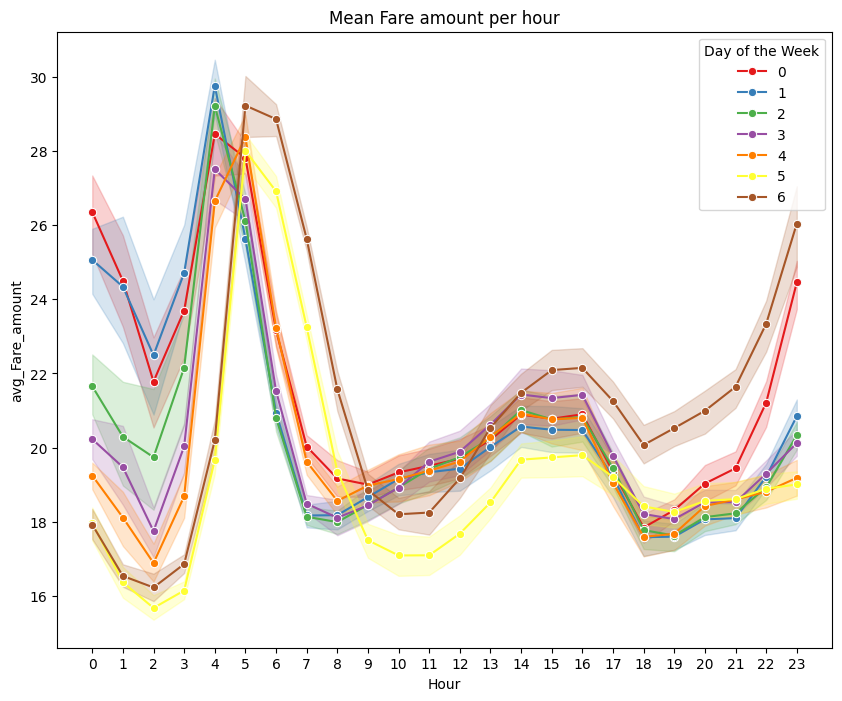

In [141]:
fare_amount_per_hour=(
   batched_taxi_df.groupby(['m','day_of_week','h'])['fare_amount']
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by='day_of_week')

)

#Plotting how the average_fare per hour  fluctuates during the week.
plt.figure(figsize=(10,8))
sns.lineplot(data=fare_amount_per_hour,x='h',y='fare_amount',hue='day_of_week', estimator="mean" ,marker="o",palette=sns.color_palette("Set1", n_colors=7))
plt.title('Mean Fare amount per hour')
plt.legend(title='Day of the Week',loc='upper right')
plt.xticks(range(0,24))
plt.xlabel('Hour')
plt.ylabel('avg_Fare_amount')
plt.show()

In [142]:
# Analyzing the average hourly fare amount behavior per pickup_locationID during the week.
fare_amount_per_PulocationID=(
    batched_taxi_df.groupby(['PULocationID','day_of_week','h'])['fare_amount']
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by=['fare_amount','day_of_week'], ascending=[False,True])
)

fare_amount_per_PulocationID.head()

,PULocationID,day_of_week,h,fare_amount
26451,213,4,3,652.719971
12599,99,0,1,446.100006
25333,203,3,23,360.000000
27464,221,6,9,295.000000
31984,254,2,23,288.829987


In [26]:
# how the average fare amount per trip distance 
average_fare_amount_per_trip_distance=(
    batched_taxi_df.groupby(['trip_distance','PULocationID','DOLocationID','day_of_week','h'])['fare_amount']
    .mean()
    .round(3)
    .reset_index()
    .sort_values(by='fare_amount',ascending=False)
    
)
average_fare_amount_per_trip_distance.head()


,trip_distance,PULocationID,DOLocationID,day_of_week,h,fare_amount
736358,44.509998,145,145,6,13,2194.699951
14719,0.080000,130,93,6,14,800.000000
734277,24.490000,79,79,4,17,686.200012
736520,95.070000,132,265,4,8,653.299988
736531,307.250000,68,265,1,16,600.000000


In [143]:
print(f' the updated batched_taxi_df.columns : {batched_taxi_df.columns} \n')

print(f' the updated batched_taxi_df.info() : {batched_taxi_df.info()}')

 the updated batched_taxi_df.columns : Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'h',
       'day_of_week', 'm', 'trip_duration'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
Index: 13025477 entries, 593521 to 958428
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int8          
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float16       
 4   trip_distance          float32       
 5   RatecodeID             float16       
 6   store_and_fwd_flag     category      
 7   PULocationID         

In [12]:
# Create a new column for the date to use it later for merging with the weather data.
batched_taxi_df['date']=batched_taxi_df['tpep_pickup_datetime'].copy()


In [146]:
batched_taxi_df.head()

c:\Users\aleja\Downloads\AI_engineer_proyects\Proyecto_Final\env\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,h,day_of_week,m,trip_duration,date
593521,1,2023-05-06 09:47:50,2023-05-06 09:55:03,1.0,1.90,1.0,N,79,162,1,10.000000,2.5,0.5,2.800781,0.000000,1.0,16.799999,2.5,0.0,9,5,5,7,2023-05-06 09:47:50
2567542,1,2023-04-25 12:55:58,2023-04-25 13:01:54,1.0,0.90,1.0,N,246,246,1,7.200000,2.5,0.5,0.000000,0.000000,1.0,11.200000,2.5,0.0,12,1,4,5,2023-04-25 12:55:58
1323852,2,2023-11-12 13:46:54,2023-11-12 14:22:52,2.0,11.52,1.0,N,163,138,1,50.599998,5.0,0.5,13.312500,6.941406,1.0,79.849998,2.5,0.0,13,6,11,35,2023-11-12 13:46:54
1267722,2,2023-07-15 19:20:52,2023-07-15 19:24:52,2.0,0.33,1.0,N,100,170,2,5.800000,0.0,0.5,0.000000,0.000000,1.0,9.800000,2.5,0.0,19,5,7,4,2023-07-15 19:20:52
597606,1,2023-05-06 10:14:05,2023-05-06 10:20:48,0.0,1.00,1.0,N,48,142,1,7.900000,2.5,0.5,0.000000,0.000000,1.0,11.900000,2.5,0.0,10,5,5,6,2023-05-06 10:14:05


In [147]:
batched_taxi_df.dtypes

VendorID                           int8
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float16
trip_distance                   float32
RatecodeID                      float16
store_and_fwd_flag             category
PULocationID                      int16
DOLocationID                      int16
payment_type                       int8
fare_amount                     float32
extra                           float16
mta_tax                         float16
tip_amount                      float16
tolls_amount                    float16
improvement_surcharge           float16
total_amount                    float32
congestion_surcharge            float16
airport_fee                     float16
h                                 int64
day_of_week                        int8
m                                  int8
trip_duration                     int16
date                     datetime64[us]
dtype: object

# Section 0.2: Taxi_Zones

# Yellow_taxi_service_Zones: 

Variables:

Borough: The city of newyork was splitting into 7 main sectors defined as boroughs: Queens, Bronxs, Staten_island, EWR, Manthatan and Brooklin.

Zones:Indicates the name of the most places within a given borough.

LocationID: Each ID corresponds to a particular zone of a given borough.

Service_Zone: The places where trasportation services are registered and avaliable.



In [13]:
# Change the path to the correct path in your computer
df_taxi_zones=pd.read_csv('C:\\Users\\aleja\\Downloads\\AI_engineer_proyects\\Proyecto_Final\\Data\\taxi_zone_lookup.csv')

#Optimzed the memeory usage of the taxi_zones dataframe.
optimzed_taxi_zones=optimize_dtypes(df_taxi_zones)
gc.collect()

optimzed_taxi_zones.head()

# Analyze the optimized DataFrame Memory Usage
optimized_memory_usage = optimzed_taxi_zones.memory_usage(deep=True)
optimized_memory_usage_per_column = optimized_memory_usage / (1024 ** 2)  # Convert bytes to megabytes
optimized_total_memory_usage = optimized_memory_usage_per_column.sum()

# Display optimized memory usage per column and total memory usage
optimized_memory_usage_per_column, optimized_total_memory_usage


C:\Users\aleja\AppData\Local\Temp\ipykernel_27932\678863989.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if col_type != object and not np.issubdtype(col_type, np.datetime64) and not pd.api.types.is_categorical_dtype(col_type):
C:\Users\aleja\AppData\Local\Temp\ipykernel_27932\678863989.py:33: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(col_type):
C:\Users\aleja\AppData\Local\Temp\ipykernel_27932\678863989.py:33: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(col_type):
C:\Users\aleja\AppData\Local\Temp\ipykernel_27932\678863989.py:33: DeprecationWarning: is_categorical_dtype is deprecated and will

(Index           0.000122
 LocationID      0.000505
 Borough         0.000968
 Zone            0.026513
 service_zone    0.000664
 dtype: float64,
 np.float64(0.028772354125976562))

In [96]:
optimzed_taxi_zones.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [97]:
optimzed_taxi_zones.shape

(265, 4)

In [98]:
zones_per_borough=(
    optimzed_taxi_zones.groupby(['LocationID'])['Zone']
    .count()
    .reset_index()
    .sort_values(by='LocationID', ascending=False)
)
# Here we can check that that the for every zone there is a unique LocationID.
zones_per_borough['Zone'].unique()

array([1, 0])

In [12]:
optimzed_taxi_zones.isna().sum()

LocationID      0
Borough         1
Zone            1
service_zone    2
dtype: int64

In [14]:
# Drop the rows with missing values since they are not many.
optimzed_taxi_zones.dropna(axis=0,inplace=True)

In [150]:
# Check if there are remaining missing values
optimzed_taxi_zones.isna().sum()

LocationID      0
Borough         0
Zone            0
service_zone    0
dtype: int64

In [101]:
optimzed_taxi_zones['Borough'].unique()

['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn']
Categories (7, object): ['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island', 'Unknown']

In [102]:
# query the number of yellow taxi services zones per borough and Zone.
result_taxi_zones=(
      optimzed_taxi_zones.groupby(['Borough','Zone'])['service_zone']
      . size()
      . reset_index())

result_taxi_zones.head()


C:\Users\aleja\AppData\Local\Temp\ipykernel_7888\3952989562.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  optimzed_taxi_zones.groupby(['Borough','Zone'])['service_zone']


,Borough,Zone,service_zone
0,Bronx,Allerton/Pelham Gardens,1
1,Bronx,Alphabet City,0
2,Bronx,Arden Heights,0
3,Bronx,Arrochar/Fort Wadsworth,0
4,Bronx,Astoria,0


# Section 0.3: Weather_DataFrame.

We retrieved the weather data from the open-source OpenMeteoWeather API to later integrate it into the final dataset, as variables such as precipitation, snowfall, and temperature could potentially provide additional information that may affect the model's predictions for fare amount as well as trip duration.

Documentation of the features used:

is_day:{0:'night', 1:'day'}.

temperature_2m: Measures the temperature 2m above the ground.

snowfall: probability that a precipation occur in the form of snow.

snow_depth: measure the snow_depth in any avaliable units (m,cm,mm).

weather_code: encode the weather conditions as rainy, stormy, snow, calm.

(00 - 19) - No precipitation, fog, ice fog (except for 11 and 12), duststorm, sandstorm, drifting or blowing snow

(20 - 29) - Precipitation, fog, ice fog or thunderstorm at the station during the preceding hour.

(30 - 39) - Duststorm, sandstorm, drifting or blowing snow.

(40 - 49) - Fog or ice fog at the time of observation.

(50 - 59) - Drizzle at the station at the time of observation.

(60 - 69) - Rain at the station at the time of observation.

(70 - 79) - Solid precipitation not in showers at the station at the time of observation.

precipitation:

Gives the amount of precipitation in millimeters that has fallen during the indicated interval. Here, precipitation is the sum of liquid (rain, freezing rain), mix (sleet), and solid (hail, graupel, snow) precipitation. The total amount of precipitation is the sum of convective and large-scale precipitation.

Rain: The probability that rains may occur at specific hour of the day.

Cloud_related_info: Indicates how much covered is the sky in terms (low, medium, high, total).

In [15]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 40.7143,
	"longitude": -74.006,
	"start_date": "2023-01-01",
	"end_date": "2023-12-31",
	"hourly": ["temperature_2m", "rain", "snowfall", "snow_depth", "weather_code", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high", "precipitation", "is_day"],
	"timezone": "America/New_York",
	"temperature_unit": "fahrenheit",
	"wind_speed_unit": "mph",
	"precipitation_unit": "inch",
	"timeformat": "unixtime"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_rain = hourly.Variables(1).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(2).ValuesAsNumpy()
hourly_snow_depth = hourly.Variables(3).ValuesAsNumpy()
hourly_weather_code = hourly.Variables(4).ValuesAsNumpy()
hourly_cloud_cover_low = hourly.Variables(5).ValuesAsNumpy()
hourly_cloud_cover_mid = hourly.Variables(6).ValuesAsNumpy()
hourly_cloud_cover_high = hourly.Variables(7).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(8).ValuesAsNumpy()
hourly_is_day = hourly.Variables(9).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}


hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["rain"] = hourly_rain
hourly_data["snowfall"] = hourly_snowfall
hourly_data["snow_depth"] = hourly_snow_depth
hourly_data["weather_code"] = hourly_weather_code
hourly_data["cloud_cover_low"] = hourly_cloud_cover_low
hourly_data["cloud_cover_mid"] = hourly_cloud_cover_mid
hourly_data["cloud_cover_high"] = hourly_cloud_cover_high
hourly_data["precipitation"] = hourly_precipitation
hourly_data["is_day"] = hourly_is_day

Coordinates 40.738136291503906°N -74.04254150390625°E
Elevation 51.0 m asl
Timezone b'America/New_York'b'GMT-4'
Timezone difference to GMT+0 -14400 s


In [16]:
#Weather df contains  the 2023 weather information per hour
weather_df = pd.DataFrame(data = hourly_data)

In [105]:
weather_df.head()

,date,temperature_2m,rain,snowfall,snow_depth,weather_code,cloud_cover_low,cloud_cover_mid,cloud_cover_high,precipitation,is_day
0,2023-01-01 04:00:00+00:00,51.120499,0.039370,0.0,0.0,55.0,67.0,100.0,100.0,0.039370,0.0
1,2023-01-01 05:00:00+00:00,50.670502,0.039370,0.0,0.0,55.0,2.0,100.0,99.0,0.039370,0.0
2,2023-01-01 06:00:00+00:00,50.580502,0.003937,0.0,0.0,51.0,3.0,76.0,0.0,0.003937,0.0
3,2023-01-01 07:00:00+00:00,50.400501,0.000000,0.0,0.0,0.0,0.0,3.0,0.0,0.000000,0.0
4,2023-01-01 08:00:00+00:00,49.230499,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [20]:
weather_df.shape

(8760, 11)

In [17]:
weather_df['date']=pd.to_datetime(weather_df['date'])
weather_df['date']=weather_df['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
weather_df['date']=pd.to_datetime(weather_df['date']).astype('datetime64[us]')


In [18]:
# Apply the optimization function to the DataFrame
optimzed_weather_df=optimize_dtypes(weather_df)
optimzed_weather_df.head()

C:\Users\aleja\AppData\Local\Temp\ipykernel_27932\678863989.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if col_type != object and not np.issubdtype(col_type, np.datetime64) and not pd.api.types.is_categorical_dtype(col_type):
C:\Users\aleja\AppData\Local\Temp\ipykernel_27932\678863989.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if col_type != object and not np.issubdtype(col_type, np.datetime64) and not pd.api.types.is_categorical_dtype(col_type):
C:\Users\aleja\AppData\Local\Temp\ipykernel_27932\678863989.py:12: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if col_type != object and not np.issubdtype(col_type, np.datetime64) and not pd.api.types.is_categorical_dty

,date,temperature_2m,rain,snowfall,snow_depth,weather_code,cloud_cover_low,cloud_cover_mid,cloud_cover_high,precipitation,is_day
0,2023-01-01 04:00:00,51.12500,0.039368,0.0,0.0,55.0,67.0,100.0,100.0,0.039368,0.0
1,2023-01-01 05:00:00,50.65625,0.039368,0.0,0.0,55.0,2.0,100.0,99.0,0.039368,0.0
2,2023-01-01 06:00:00,50.59375,0.003937,0.0,0.0,51.0,3.0,76.0,0.0,0.003937,0.0
3,2023-01-01 07:00:00,50.40625,0.000000,0.0,0.0,0.0,0.0,3.0,0.0,0.000000,0.0
4,2023-01-01 08:00:00,49.21875,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [19]:
optimized_memory_usage = optimzed_weather_df.memory_usage(deep=True)
optimized_memory_usage_per_column = optimized_memory_usage / (1024 ** 2)  # Convert bytes to megabytes
optimized_total_memory_usage = optimized_memory_usage_per_column.sum()

# Display optimized memory usage per column and total memory usage
optimized_memory_usage_per_column, optimized_total_memory_usage

(Index               0.000122
 date                0.066833
 temperature_2m      0.016708
 rain                0.016708
 snowfall            0.016708
 snow_depth          0.016708
 weather_code        0.016708
 cloud_cover_low     0.016708
 cloud_cover_mid     0.016708
 cloud_cover_high    0.016708
 precipitation       0.016708
 is_day              0.016708
 dtype: float64,
 np.float64(0.234039306640625))

In [78]:
optimzed_weather_df.sample(10)

c:\Users\aleja\Downloads\AI_engineer_proyects\Proyecto_Final\env\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,date,temperature_2m,rain,snowfall,snow_depth,weather_code,cloud_cover_low,cloud_cover_mid,cloud_cover_high,precipitation,is_day
8354,2023-12-15 06:00:00,30.87500,0.000000,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.0
5009,2023-07-28 21:00:00,90.37500,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
4039,2023-06-18 11:00:00,62.62500,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.0
2173,2023-04-01 17:00:00,62.18750,0.027557,0.0,0.0,53.0,17.0,100.0,100.0,0.027557,1.0
5275,2023-08-08 23:00:00,75.50000,0.000000,0.0,0.0,0.0,8.0,1.0,0.0,0.000000,1.0
319,2023-01-14 11:00:00,33.21875,0.000000,0.0,0.0,3.0,100.0,67.0,0.0,0.000000,0.0
8580,2023-12-24 16:00:00,42.93750,0.000000,0.0,0.0,3.0,7.0,100.0,41.0,0.000000,1.0
1248,2023-02-22 04:00:00,34.84375,0.000000,0.0,0.0,0.0,0.0,0.0,16.0,0.000000,0.0
6017,2023-09-08 21:00:00,84.75000,0.003937,0.0,0.0,51.0,7.0,6.0,98.0,0.003937,1.0
5521,2023-08-19 05:00:00,63.53125,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [19]:
weather_df_new=weather_df[(weather_df['date'].isin(batched_taxi_df['tpep_pickup_datetime'])) |  weather_df['date'].isin(batched_taxi_df['tpep_dropoff_datetime'])]

In [111]:
weather_df_new.head()

c:\Users\aleja\Downloads\AI_engineer_proyects\Proyecto_Final\env\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,date,temperature_2m,rain,snowfall,snow_depth,weather_code,cloud_cover_low,cloud_cover_mid,cloud_cover_high,precipitation,is_day
0,2023-01-01 04:00:00,51.12500,0.039368,0.0,0.0,55.0,67.0,100.0,100.0,0.039368,0.0
1,2023-01-01 05:00:00,50.65625,0.039368,0.0,0.0,55.0,2.0,100.0,99.0,0.039368,0.0
3,2023-01-01 07:00:00,50.40625,0.000000,0.0,0.0,0.0,0.0,3.0,0.0,0.000000,0.0
5,2023-01-01 09:00:00,48.06250,0.000000,0.0,0.0,2.0,8.0,0.0,57.0,0.000000,0.0
8,2023-01-01 12:00:00,43.75000,0.000000,0.0,0.0,2.0,14.0,11.0,96.0,0.000000,0.0


In [112]:
weather_df_new.dtypes

date                datetime64[us]
temperature_2m             float16
rain                       float16
snowfall                   float16
snow_depth                 float16
weather_code               float16
cloud_cover_low            float16
cloud_cover_mid            float16
cloud_cover_high           float16
precipitation              float16
is_day                     float16
dtype: object

In [20]:
# Merging yellow_taxi_df with weather_df.
result_df=batched_taxi_df.merge(weather_df_new, on='date', how='inner')

In [21]:
result_df.shape

(2242, 34)

In [158]:
result_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'h',
       'day_of_week', 'm', 'trip_duration', 'date', 'temperature_2m', 'rain',
       'snowfall', 'snow_depth', 'weather_code', 'cloud_cover_low',
       'cloud_cover_mid', 'cloud_cover_high', 'precipitation', 'is_day'],
      dtype='object')

In [22]:
result_df=result_df.drop_duplicates()

In [23]:
result_df.shape

(2242, 34)

In [31]:
result_df.rename(columns={'date':'hourly_weather_time'}, inplace=True)

In [118]:
result_df.head()


c:\Users\aleja\Downloads\AI_engineer_proyects\Proyecto_Final\env\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\aleja\Downloads\AI_engineer_proyects\Proyecto_Final\env\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,temperature_2m,rain,snowfall,snow_depth,weather_code,cloud_cover_low,cloud_cover_mid,cloud_cover_high,precipitation,is_day
0,1,2023-03-09 23:00:00,2023-03-09 23:15:18,1.0,2.80,1.0,N,161,239,1,...,43.84375,0.0,0.0,0.000000,2.0,51.0,3.0,0.0,0.0,0.0
1,2,2023-03-03 22:00:00,2023-03-03 22:04:31,1.0,0.71,1.0,N,237,162,1,...,39.50000,0.0,0.0,0.032806,3.0,0.0,100.0,100.0,0.0,1.0
2,2,2023-06-10 14:00:00,2023-06-10 14:15:05,4.0,1.16,1.0,N,230,100,1,...,67.56250,0.0,0.0,0.000000,1.0,0.0,27.0,1.0,0.0,1.0
3,1,2023-08-24 23:00:00,2023-08-24 23:03:06,1.0,0.60,1.0,Y,236,141,1,...,71.00000,0.0,0.0,0.000000,2.0,13.0,49.0,20.0,0.0,1.0
4,1,2023-06-15 08:00:00,2023-06-15 08:21:29,1.0,3.20,1.0,N,239,164,1,...,58.87500,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0


filtering out the rows that correspons to snowfalls and rainy weather conditions.

In [34]:
result_df[(result_df['weather_code'].isin([71.,73.])) | (result_df['weather_code'].isin([61.0,63.0]))]

c:\Users\aleja\Downloads\AI_engineer_proyects\Proyecto_Final\env\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\aleja\Downloads\AI_engineer_proyects\Proyecto_Final\env\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,temperature_2m,rain,snowfall,snow_depth,weather_code,cloud_cover_low,cloud_cover_mid,cloud_cover_high,precipitation,is_day
21,2,2023-08-10 15:00:00,2023-08-10 15:05:09,1.0,0.74,1.0,N,211,231,1,...,75.06250,0.051178,0.000000,0.000000,61.0,15.0,93.0,100.0,0.051178,1.0
23,2,2023-07-16 13:00:00,2023-07-16 13:08:00,NaN,2.27,NaN,NaN,107,145,0,...,75.00000,0.173218,0.000000,0.000000,63.0,26.0,100.0,100.0,0.173218,1.0
44,1,2023-03-14 19:00:00,2023-03-14 19:07:39,1.0,0.70,1.0,N,186,246,1,...,37.15625,0.000000,0.027557,0.032806,71.0,100.0,100.0,0.0,0.003937,1.0
55,2,2023-06-23 17:00:00,2023-06-23 17:18:58,1.0,1.30,1.0,N,186,170,1,...,70.12500,0.232300,0.000000,0.000000,63.0,100.0,39.0,100.0,0.232300,1.0
73,2,2023-12-11 08:00:00,2023-12-11 08:11:00,NaN,1.09,NaN,NaN,236,262,0,...,43.18750,0.059052,0.000000,0.000000,61.0,100.0,100.0,100.0,0.059052,0.0
117,2,2023-12-11 13:00:00,2023-12-11 13:16:07,1.0,9.24,1.0,N,132,39,1,...,38.34375,0.055115,0.000000,0.000000,61.0,100.0,100.0,74.0,0.055115,1.0
133,2,2023-03-14 01:00:00,2023-03-14 01:30:36,1.0,8.61,1.0,N,229,244,2,...,39.87500,0.078735,0.000000,0.000000,61.0,100.0,100.0,0.0,0.078735,0.0
148,2,2023-08-07 16:00:00,2023-08-07 16:19:56,1.0,2.52,1.0,N,142,186,2,...,76.87500,0.188965,0.000000,0.000000,63.0,35.0,51.0,7.0,0.188965,1.0
230,2,2023-03-15 00:00:00,2023-03-15 00:23:43,1.0,10.51,1.0,N,100,127,2,...,33.65625,0.000000,0.027557,0.065613,71.0,64.0,100.0,99.0,0.003937,0.0
244,2,2023-04-01 15:00:00,2023-04-01 15:08:00,NaN,1.49,NaN,NaN,50,68,0,...,60.12500,0.086609,0.000000,0.000000,61.0,96.0,100.0,100.0,0.086609,1.0


In [164]:
result_df['trip_duration']=result_df['trip_duration'].astype('int64')

In [ ]:
bad_weather_conditions=(
    result_df[(result_df['weather_code'].isin([71.,73.])) | (result_df['weather_code'].isin([61.0,63.0]))]
    .groupby(['m','day_of_week','h'])['trip_duration']
    .mean()
    .round(2)
    .reset_index()
)


C:\Users\aleja\AppData\Local\Temp\ipykernel_12376\1619019010.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot( data=bad_weather_conditions,x='m', y='trip_duration',palette=sns.color_palette("Set1", n_colors=2))


Text(0.5, 1.0, 'mean_trip_duration vs precipitation')

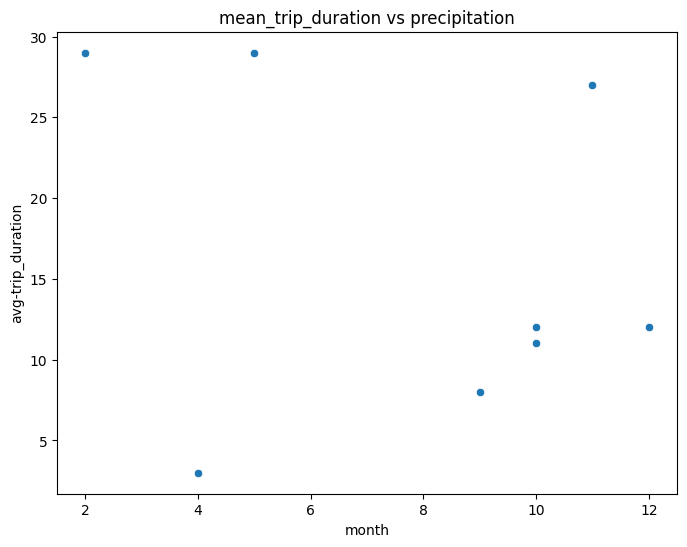

In [41]:
#Option 1  2D plot to visualize the relationship between the fare_amount and precipitation
fig = plt.figure(figsize=(8, 6))
sns.scatterplot( data=bad_weather_conditions,x='m', y='trip_duration',palette=sns.color_palette("Set1", n_colors=2))
plt.xlabel("month")
plt.ylabel("avg-trip_duration")
plt.title("mean_trip_duration vs precipitation")



In [85]:
result_df.shape

(2274, 34)

# Section 0.4: Traffic_Dataframe

Variables:

vol: traffic_volume

streets: streets names

fromst: where the traffic it ends


tost: the source of the traffic


direction: north, west, south,  east  in cartisian coordinates where the traffic lies.

boro:


segmentid: The fraction of a particular street where the traffic is registered.


hh: hour

mm:minutes ( every 15 min an update is generated on the traffic status)


m: month of the year


y: year


requestid: from the station where the information was requested.


In [24]:
client = Socrata("data.cityofnewyork.us", 'uLLQQtuSxbcdtSdwRRxLL3fGi',username='team4anyone@gmail.com',password='9kmb.NZAvj2Xdfz')

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 100000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("7ym2-wayt", limit=3000, where="yr='2023'")


In [25]:
# Loading the traffic data into a DataFrame
traffic_df = pd.DataFrame(results)
traffic_df.head()

,requestid,boro,yr,m,d,hh,mm,vol,segmentid,wktgeom,street,fromst,tost,direction
0,36828,Manhattan,2023,11,1,18,30,353,146631,POINT (1002754.5374999298 235875.81836194085),MADISON AVENUE BRIDGE,Harlem River Shoreline,Harlem River Shoreline,EB
1,36828,Manhattan,2023,11,1,18,45,330,146631,POINT (1002754.5374999298 235875.81836194085),MADISON AVENUE BRIDGE,Harlem River Shoreline,Harlem River Shoreline,EB
2,36828,Manhattan,2023,11,1,19,0,345,146631,POINT (1002754.5374999298 235875.81836194085),MADISON AVENUE BRIDGE,Harlem River Shoreline,Harlem River Shoreline,EB
3,36828,Manhattan,2023,11,1,19,15,338,146631,POINT (1002754.5374999298 235875.81836194085),MADISON AVENUE BRIDGE,Harlem River Shoreline,Harlem River Shoreline,EB
4,36828,Manhattan,2023,11,1,19,30,321,146631,POINT (1002754.5374999298 235875.81836194085),MADISON AVENUE BRIDGE,Harlem River Shoreline,Harlem River Shoreline,EB


In [163]:
traffic_df.shape

(3000, 14)

In [26]:
# Apply the optimization function to the DataFrame
optimized_traffic_df=optimize_dtypes(traffic_df)
optimized_traffic_df.head()

C:\Users\aleja\AppData\Local\Temp\ipykernel_27932\678863989.py:33: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(col_type):
C:\Users\aleja\AppData\Local\Temp\ipykernel_27932\678863989.py:33: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(col_type):
C:\Users\aleja\AppData\Local\Temp\ipykernel_27932\678863989.py:33: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(col_type):
C:\Users\aleja\AppData\Local\Temp\ipykernel_27932\678863989.py:33: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDty

,requestid,boro,yr,m,d,hh,mm,vol,segmentid,wktgeom,street,fromst,tost,direction
0,36828,Manhattan,2023,11,1,18,30,353,146631,POINT (1002754.5374999298 235875.81836194085),MADISON AVENUE BRIDGE,Harlem River Shoreline,Harlem River Shoreline,EB
1,36828,Manhattan,2023,11,1,18,45,330,146631,POINT (1002754.5374999298 235875.81836194085),MADISON AVENUE BRIDGE,Harlem River Shoreline,Harlem River Shoreline,EB
2,36828,Manhattan,2023,11,1,19,0,345,146631,POINT (1002754.5374999298 235875.81836194085),MADISON AVENUE BRIDGE,Harlem River Shoreline,Harlem River Shoreline,EB
3,36828,Manhattan,2023,11,1,19,15,338,146631,POINT (1002754.5374999298 235875.81836194085),MADISON AVENUE BRIDGE,Harlem River Shoreline,Harlem River Shoreline,EB
4,36828,Manhattan,2023,11,1,19,30,321,146631,POINT (1002754.5374999298 235875.81836194085),MADISON AVENUE BRIDGE,Harlem River Shoreline,Harlem River Shoreline,EB


In [165]:
optimized_traffic_df.dtypes

requestid    category
boro         category
yr           category
m            category
d            category
hh           category
mm           category
vol          category
segmentid    category
wktgeom      category
street       category
fromst       category
tost         category
direction    category
dtype: object

In [27]:
optimized_traffic_df.rename(columns={'yr': 'year', 'm': 'month', 'd': 'day', 'hh': 'hour', 'mm': 'minute'}, inplace=True)
optimized_traffic_df['traffic_date'] = pd.to_datetime(optimized_traffic_df[['year', 'month', 'day', 'hour', 'minute']])
optimized_traffic_df['traffic_date'] = optimized_traffic_df['traffic_date'].dt.strftime('%Y-%m-%d %H:%M:%S')
optimized_traffic_df['traffic_date'] = pd.to_datetime(optimized_traffic_df['traffic_date']).astype('datetime64[us]')

In [28]:
optimized_traffic_df.drop(columns=['year', 'month', 'day', 'hour', 'minute'], inplace=True)

In [29]:
# Change date related  columns types into numeric types
columns_to_convert = ['vol', 'segmentid']

for col in columns_to_convert:
  optimized_traffic_df[col] = pd.to_numeric(optimized_traffic_df[col], errors='coerce').astype('int64')



#top 5 Streets with highest traffic volumes per boro.
top_streets_per_boro = (
    optimized_traffic_df.groupby(['boro', 'street'])['vol']
    .sum()
    .round(2)
    .reset_index()
    .sort_values(by=['boro', 'vol'], ascending=[True, False])  # Sort within each borough by vol
)

top_street_per_boro = top_streets_per_boro.groupby('boro').first().reset_index()[['boro','street','vol']].sort_values(by='vol',ascending=False)

top_street_per_boro.head()

C:\Users\aleja\AppData\Local\Temp\ipykernel_27932\560659981.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  optimized_traffic_df.groupby(['boro', 'street'])['vol']
C:\Users\aleja\AppData\Local\Temp\ipykernel_27932\560659981.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_street_per_boro = top_streets_per_boro.groupby('boro').first().reset_index()[['boro','street','vol']].sort_values(by='vol',ascending=False)


,boro,street,vol
1,Brooklyn,HAMILTON AVENUE,84693
2,Manhattan,UNIVERSITY HEIGHTS BRIDGE,52762
4,Staten Island,MEEKER AVENUE,10920
3,Queens,CROSS BAY BOULEVARD,5926
0,Bronx,JEROME AVENUE,4935


In [30]:
optimized_traffic_df.shape

(3000, 10)

# Section 0.5: Merging the all previusly treated dataframes into  the final dataframe 


In [32]:
optimzed_taxi_zones=df_taxi_zones[(optimzed_taxi_zones['LocationID'].isin(result_df['PULocationID'])) | (optimzed_taxi_zones['LocationID'].isin(result_df['DOLocationID']))]
result_df.rename(columns={'PULocationID': 'LocationID'}, inplace=True)


In [33]:
result_df_1=result_df.merge(optimzed_taxi_zones, on='LocationID',how='inner')

In [34]:
result_df_1=result_df_1.drop_duplicates()

In [35]:
result_df_1.shape

(2226, 37)

In [40]:
result_df_1.head()

c:\Users\aleja\Downloads\AI_engineer_proyects\Proyecto_Final\env\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\aleja\Downloads\AI_engineer_proyects\Proyecto_Final\env\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,LocationID,DOLocationID,payment_type,...,snow_depth,weather_code,cloud_cover_low,cloud_cover_mid,cloud_cover_high,precipitation,is_day,Borough,Zone,service_zone
0,2,2023-05-30 14:00:00,2023-05-30 14:12:00,NaN,1.61,NaN,NaN,239,263,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,Manhattan,Upper West Side South,Yellow Zone
1,2,2023-01-19 20:00:00,2023-01-19 20:10:00,NaN,1.83,NaN,NaN,142,140,0,...,0.0,61.0,100.0,100.0,100.0,0.059052,1.0,Manhattan,Lincoln Square East,Yellow Zone
2,2,2023-10-30 18:00:00,2023-10-30 18:23:00,NaN,8.26,NaN,NaN,144,14,0,...,0.0,3.0,100.0,53.0,3.0,0.000000,1.0,Manhattan,Little Italy/NoLiTa,Yellow Zone
3,2,2023-01-07 23:00:00,2023-01-07 23:05:08,4.0,0.68,1.0,N,164,162,1,...,0.0,3.0,4.0,2.0,100.0,0.000000,0.0,Manhattan,Midtown South,Yellow Zone
4,1,2023-06-24 23:00:00,2023-06-24 23:09:08,1.0,1.60,1.0,N,79,232,1,...,0.0,3.0,2.0,13.0,95.0,0.000000,1.0,Manhattan,East Village,Yellow Zone


In [36]:
result_df_1.rename(columns={'Borough':'boro'}, inplace=True)

In [37]:
result_df_1.shape

(2226, 37)

In [38]:
result_df_1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'LocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'h',
       'day_of_week', 'm', 'trip_duration', 'date', 'temperature_2m', 'rain',
       'snowfall', 'snow_depth', 'weather_code', 'cloud_cover_low',
       'cloud_cover_mid', 'cloud_cover_high', 'precipitation', 'is_day',
       'boro', 'Zone', 'service_zone'],
      dtype='object')

In [39]:
result_df_2=result_df_1.rename(columns= {'LocationID':'PULocationID'})

In [40]:
result_df_2.shape

(2226, 37)

In [57]:
# Encoding the categorical features.

encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False for a dense array
encoded_data = encoder.fit_transform(result_df_2[['Zone','boro','service_zone']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Zone','boro','service_zone']))

new_result_df = pd.concat([result_df_2, encoded_df], axis=1)
new_result_df.drop(['Zone','boro','service_zone'], axis=1, inplace=True)


We called a pandas function to display all columns instead of just a few of them.

In [47]:
pd.set_option('display.max_columns', None)
new_result_df.head()


c:\Users\aleja\Downloads\AI_engineer_proyects\Proyecto_Final\env\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,LocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,h,day_of_week,m,trip_duration,date,temperature_2m,rain,snowfall,snow_depth,weather_code,cloud_cover_low,cloud_cover_mid,cloud_cover_high,precipitation,is_day,Zone_Alphabet City,Zone_Arrochar/Fort Wadsworth,Zone_Astoria,Zone_Baisley Park,Zone_Battery Park,Zone_Battery Park City,Zone_Bayside,Zone_Bedford,Zone_Belmont,Zone_Bensonhurst West,Zone_Bloomingdale,Zone_Brooklyn Heights,Zone_Brownsville,Zone_Bushwick North,Zone_Canarsie,Zone_Central Harlem,Zone_Central Harlem North,Zone_Central Park,Zone_Chinatown,Zone_Claremont/Bathgate,Zone_Clinton East,Zone_Clinton Hill,Zone_Clinton West,Zone_Co-Op City,Zone_Cobble Hill,Zone_Corona,Zone_Crown Heights North,Zone_Crown Heights South,Zone_Cypress Hills,Zone_DUMBO/Vinegar Hill,Zone_Downtown Brooklyn/MetroTech,Zone_East Chelsea,Zone_East Concourse/Concourse Village,Zone_East Elmhurst,Zone_East Harlem North,Zone_East Harlem South,Zone_East New York,Zone_East Village,Zone_East Williamsburg,Zone_Erasmus,Zone_Financial District North,Zone_Financial District South,Zone_Flatiron,Zone_Flushing,Zone_Forest Hills,Zone_Fort Greene,Zone_Garment District,Zone_Gramercy,Zone_Greenpoint,Zone_Greenwich Village North,Zone_Greenwich Village South,Zone_Hamilton Heights,Zone_Hudson Sq,Zone_Inwood,Zone_JFK Airport,Zone_Jackson Heights,Zone_Jamaica,Zone_Jamaica Estates,Zone_Kensington,Zone_Kips Bay,Zone_LaGuardia Airport,Zone_Laurelton,Zone_Lenox Hill East,Zone_Lenox Hill West,Zone_Lincoln Square East,Zone_Lincoln Square West,Zone_Little Italy/NoLiTa,Zone_Long Island City/Hunters Point,Zone_Lower East Side,Zone_Madison,Zone_Manhattan Valley,Zone_Manhattanville,Zone_Maspeth,Zone_Meatpacking/West Village West,Zone_Melrose South,Zone_Midtown Center,Zone_Midtown East,Zone_Midtown North,Zone_Midtown South,Zone_Morningside Heights,Zone_Mott Haven/Port Morris,Zone_Murray Hill,Zone_Old Astoria,Zone_Park Slope,Zone_Pelham Parkway,Zone_Penn Station/Madison Sq West,Zone_Prospect-Lefferts Gardens,Zone_Queensbridge/Ravenswood,Zone_Red Hook,Zone_Richmond Hill,Zone_Seaport,Zone_SoHo,Zone_Starrett City,Zone_Stuy Town/Peter Cooper Village,Zone_Sunnyside,Zone_Sutton Place/Turtle Bay North,Zone_Times Sq/Theatre District,Zone_TriBeCa/Civic Center,Zone_Two Bridges/Seward Park,Zone_UN/Turtle Bay South,Zone_Union Sq,Zone_Upper East Side North,Zone_Upper East Side South,Zone_Upper West Side North,Zone_Upper West Side South,Zone_Washington Heights North,Zone_Washington Heights South,Zone_West Chelsea/Hudson Yards,Zone_West Village,Zone_Williamsburg (North Side),Zone_Williamsburg (South Side),Zone_Woodside,Zone_World Trade Center,Zone_Yorkville East,Zone_Yorkville West,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens,boro_Staten Island,service_zone_Airports,service_zone_Boro Zone,service_zone_Yellow Zone
0,2,2023-05-30 14:00:00,2023-05-30 14:12:00,NaN,1.61,NaN,NaN,239,263,0,12.429688,0.0,0.5,0.000000,0.000000,1.0,16.437500,NaN,NaN,14,1,5,12,2023-05-30 14:00:00,61.90625,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2,2023-01-19 20:00:00,2023-01-19 20:10:00,NaN,1.83,NaN,NaN,142,140,0,13.476562,0.0,0.5,3.500000,0.000000,1.0,20.984375,NaN,NaN,20,3,1,10,2023-01-19 20:00:00,41.12500,0.059052,0.0,0.0,61.0,100.0,100.0,100.0,0.059052,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

# Section 1: EDA on the Result_df

In [58]:
# STEP 1: Getting to know the data first hand.
def sample_df(df, n_rows=20):
    """Returns a random sample of rows from a dataframe."""
    return df.sample(n_rows)


def get_only_numeric_columns(df):
    """Returns only the numeric columns of a given dataframe."""
    return df.select_dtypes(include=[np.number]).columns

def get_value_counts(df, column, uniques=10):
    """Return the value counts if the number of unique occurrences is lower than specified (default = 10)."""
    if df[column].nunique() <= uniques:
        return df[column].value_counts()
    else:
        print(f"Too many values! ({df[column].nunique()})")
        return df[column].nunique()

def adjust_ratecodeid(df):
    """Drop values other than the documented ones (1, 2, 3, 4, 5, 6)."""
    valid_ratecodes = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
    df = df[df['RatecodeID'] != 99.0]

    return df

def get_descriptors(df):
    print(f"Shape:\n{df.shape}\n")
    print(f"Number of unique values:\n{df.nunique()}\n")
    print(f"Columns:\n{df.columns.tolist()}\n")
    print(f"Data types:\n{df.dtypes}\n")
    print(f"Missing values:\n{df.isna().sum()}\n")
    print(f"Summary statistics:\n{df.describe()}\n")
    print(f"Count of values:\n{df.value_counts().to_string()}\n")
    print(f"Memory usage (MB):\n{df.memory_usage(deep=True).sum() / 1e6:.2f}\n")  # Total memory used
    print(f"Duplicate rows:\n{df.duplicated().sum()}\n")  # Count of duplicate rows

    # For categorical columns
    if df.select_dtypes(include=['object', 'category']).shape[1] > 0:
        print("Categorical value counts:")
        for col in df.select_dtypes(include=['object', 'category']).columns:
            print(f"\nColumn '{col}':\n{df[col].value_counts().to_string()}")

# STEP 2: Functions that deal with missing values and/or irregular data.
def missing_values_distribution(df):
    """Gets the missing values for a given df, and plots in a bar chart."""
    return df.isna().sum().sort_values(ascending=True).plot(kind='bar', title='Missing Values Distribution', figsize=(10,5), color='gray')

def filter_by_missing_values(df, column):
    return df[df[column]!=df[column]]

# Gaining insight on the dataset and preparing for plausible future queries.
def group_by_cat_column(df, cat_columns):
    if isinstance(cat_columns, str):  # Convert a single column to list
        cat_columns = [cat_columns]
    return df[get_only_numeric_columns(df).tolist()].groupby(cat_columns).sum().reset_index()

# Getting rid of the negative values regarding fare_amount and total_amount
def drop_negative_values(df):
    """Function to take out negative values from numeric columns (int or float)."""
    df_filtered = df[(df.select_dtypes(include=np.number) >= 0).all(axis=1)]
    return df_filtered

# Simple imputation for treating missing values.
def impute_missing_values(df):
  # Only affects numeric columns with missing values
  num_imputer = SimpleImputer(strategy="mean")
  # Identify numeric columns
  num_cols = df.select_dtypes(include=['int64', 'float64']).columns
  # finally transform the data
  df[num_cols]=num_imputer.fit_transform(df[num_cols])
  return df

# Step 3: Feature Enginnering :

# Performing feature enginnering to devise trip duration and other relevant features

def feature_engineering(df,dtime1_col, dtimef_col):
  df['trip_duration']=(df[dtimef_col]-df[dtime1_col]).dt.total_seconds()
  df['dayofweek']=df[dtime1_col].dt.dayofweek
  return df

# Step 4: Dropping irrevelvant categorical and numerical columns:

def drop_columns(df, columns):
    return df.drop(columns=columns,axis=1).copy()

In [59]:
print(f'the number of row  and columns in the new_result_df is: {new_result_df.shape} \n')

the number of row  and columns in the new_result_df is: (2085, 115) 



In [60]:
print(f'the columns in the new_result_df are:{new_result_df.columns} \n')

the columns in the new_result_df are:Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type',
       ...
       'Zone_World Trade Center', 'Zone_Yorkville East', 'Zone_Yorkville West',
       'boro_Bronx', 'boro_Brooklyn', 'boro_Manhattan', 'boro_Queens',
       'service_zone_Airports', 'service_zone_Boro Zone',
       'service_zone_Yellow Zone'],
      dtype='object', length=115) 



To ensure our models get the most out of the data is essecial to treat it's missing values for both categorical and numeric columnns as well as format any incoherent notations that may have occured when imputing the data.

In that order of ideas after carefully analyzing the data's documention we have found erroneous values for the ratecodeid feature and negative values for both distances and fares, so the following cells' main objetive is to filter out this information and only preseve the well-formatted ones, additionally we will implement a simple imputing to deal with the missing values.

In [61]:
# Impute the missing values only for the numerical columns
new_result_df=impute_missing_values(new_result_df)

# Treat the RatecodeID column to ensure no invalid values are present.
new_result_df=adjust_ratecodeid(new_result_df)
# Drop the columns that are not needed fo the analysis
new_result_df=drop_negative_values(new_result_df)

In [63]:
new_result_df['passenger_count']= new_result_df[new_result_df['passenger_count']>0]['passenger_count']
new_result_df['passenger_count'].value_counts()
#new_result_df.head()

passenger_count
1.0    1242
2.0     256
3.0      43
4.0      33
5.0      30
6.0      14
Name: count, dtype: int64

In [64]:
df=drop_columns(new_result_df,['RatecodeID','tolls_amount','improvement_surcharge','total_amount','mta_tax','tip_amount','congestion_surcharge','airport_fee','cloud_cover_low','cloud_cover_mid','cloud_cover_high','extra','date','tpep_pickup_datetime','tpep_dropoff_datetime','store_and_fwd_flag'])

# Section 2: Outliers

After some in detail review on the features plotting distributions as well as box_plots we have encountered that many of columns have outliers, thus our task for this section is to sucessfully treat them to then proceed to the modelling stage.

Strategy: Since data has several outliers, the following techniques will be implemented:

1) Robust_Scaler to get rid of them.

2) Normalization of data using StandardScaler.

The latter is to avoid possible problems with the model overweighing the features with higher range over the others of smaller ranges.

# Method 1: Robust_Scaler and Standard Scalar approach:

In [65]:
def ouliers_treatment(df):
  scaler=RobustScaler()
  df_robust=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
  return df_robust

#Optional
def normalize_data(df):
  standard_scaler=StandardScaler()
  df_normalized=pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
  return df_normalized

In [66]:
df=ouliers_treatment(df)


# Method 2: IQR (Interquartile Range) Method (Optional)

In [67]:
def get_extreme_values(df,column):
  q3=df[column].quantile(0.75)
  q1=df[column].quantile(0.25)
  iqt=q3-q1
  lower_bound=q1-1.5*iqt
  upper_bound=q3 + 1.5*iqt
  return lower_bound, upper_bound


# Verifies the presence of outliers in the dataframe
def ouliers(df, column):
  lower_bound, upper_bound=get_extreme_values(df,column)
  return ((df[column]<lower_bound) | (df[column]>upper_bound)).any()


def remove_col_outliers(df, column):
  Lowerbound, Upperbound= get_extreme_values(df,column)
  df[df[column]>Upperbound]=Upperbound
  df[df[column]<Lowerbound]=Lowerbound
  return df[(df[column] >= Lowerbound) & (df[column] <= Upperbound)]

def remove_outliers(df,columns):
  for column in columns:
    if ouliers(df,column):
      df=remove_col_outliers(df,column)
  return df

In [68]:
df2=remove_outliers(df,['fare_amount', 'trip_distance','trip_duration'])

In [69]:
df2.shape

(1618, 99)

# Section 3.0: Reducing the feature space:

It was decided to instantiate a correlation matrix for this task. Since data noise and redundant columns have already been addressed, the focus will now aim to reduce the feature space, so that the set of features that best contribute to predicting fares and trip durations, are kept.

In [ ]:
# correlation matrix to discard low correlated features.
corr=df.corr(method='kendall', numeric_only=True).head()


From the above correlation matrix, it can be noticed that the variables that portrays stronger correlation values in regard the taxi_fair:


As for the trip duration is concern we found the following set of features:

In [70]:
# Choose the columns with higher correation values for the creating the final dataframe.
df_f_fare=pd.DataFrame(df2[['trip_distance','payment_type','rain','snowfall','passenger_count','weather_code','precipitation','fare_amount','h','m','day_of_week','is_day']], columns=  ['trip_distance','m','h','day_of_week','is_day','weather_code','precipitation','payment_type','rain', 'snowfall','passenger_count', 'fare_amount'])

# Final data frame for estimating the trip duration.
df_f_Tduration=pd.DataFrame(df2[[ 'trip_distance','PULocationID','DOLocationID','rain','snowfall','weather_code','snow_depth', 'trip_duration','h','day_of_week','m','is_day']],columns=[ 'trip_distance','PULocationID','DOLocationID','rain','snowfall','weather_code','snow_depth','trip_duration','h','day_of_week','m','is_day'])

Saving the finals datasets at some folder:

In [71]:
# change the path to the correct path in your computer.
path='C:\\Users\\aleja\Downloads\\AI_engineer_proyects\\Proyecto_Final\\Datasets for Model Training'
df_f_fare.to_csv(path+'/fare.csv', index=False)
df_f_Tduration.to_csv(path+'/Trip_duration.csv', index=False)

# Section 4.0 : Training Models

# Section 4.1 Importing all model dependencies

In [ ]:
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aleja\Downloads\AI_engineer_proyects\Proyecto_Final\env\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
You should consider upgrading via the 'c:\Users\aleja\Downloads\AI_engineer_proyects\Proyecto_Final\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [72]:
#Simple Models
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 📌 Imports for Cross-Validation and Hyperparameter Tuning in XGBoost and RandomForest

# Imports for cross-validation and hyperparameter search
from sklearn.model_selection import cross_val_score  # Evaluates the model using cross-validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # Hyperparameter tuning methods

# Imports for XGBoost regression model
import xgboost as xgb # Regression model using XGBoost

# Imports for Random Forest regression model
from sklearn.ensemble import RandomForestRegressor  # Regression model using Random Forest


#Complex Models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping ,ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers
import joblib




# Section 4.2 : Loading The datasets

In [73]:
# Taxi_Fare 
# change the path to the correct path shown at the end of the last section for both datasets
X1=pd.read_csv('C:\\Users\\aleja\\Downloads\\AI_engineer_proyects\\Proyecto_Final\\Datasets for Model Training\\fare.csv')

# Trip Duratiom
X2=pd.read_csv('C:\\Users\\aleja\\Downloads\\AI_engineer_proyects\\Proyecto_Final\\Datasets for Model Training\Trip_duration.csv')


Splitting the data into target and input vector:

In [74]:

#Fare
y1=X1['fare_amount']
X1_1=X1.drop('fare_amount', axis=1).copy()

#Trip_duration
y2=X2['trip_duration']
X2_2=X2.drop('trip_duration', axis=1).copy()

In [290]:
X1_1.sample(10)

,trip_distance,m,h,day_of_week,is_day,weather_code,precipitation,payment_type,rain,snowfall,passenger_count
1716,0.117187,-0.200,0.090909,-0.666667,0.00,6.469003,1.000000,0.00,1.000000,0.00,0.00
1307,-0.304687,0.800,0.363636,-0.333333,0.00,-0.269542,0.000000,0.00,0.000000,0.00,0.00
434,0.527344,-1.200,0.272727,-1.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00
2800,-0.402344,0.400,-0.181818,0.666667,0.00,-0.404313,0.000000,0.00,0.000000,0.00,0.00
2879,0.113281,-0.800,0.181818,-0.666667,0.00,-0.269542,0.000000,0.00,0.000000,0.00,0.00
1298,0.015625,0.200,-0.181818,0.666667,0.00,-0.404313,0.000000,0.00,0.000000,0.00,0.00
2000,0.382813,-0.800,-1.272727,0.333333,-2.00,6.469003,4.000000,1.00,4.000000,0.00,0.00
1085,-0.429688,-0.200,-0.636364,0.333333,-2.00,8.086254,28.000000,1.00,28.000000,0.00,0.00
2948,2.214844,0.084,-0.598182,1.140000,12.84,0.595687,1884.794998,6.42,1884.794998,7.42,6.42
951,0.410156,-0.200,0.545455,0.000000,0.00,7.008086,10.000000,0.00,10.000000,0.00,0.00


In [240]:
X1_1.nunique()

trip_distance      1127
m                    12
h                    24
day_of_week           7
is_day                2
weather_code         13
precipitation        71
payment_type          5
rain                 71
snowfall             12
passenger_count       6
dtype: int64

# Section 4.3: Splitting the data into train/Eval/Test

In [75]:
#Fare
X1_train, X1_, y1_train, y1_ = train_test_split(X1_1, y1, test_size=0.4, random_state=42)
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_, y1_, test_size=0.5, random_state=42)

# Trip duration
X2_train, X2_, y2_train, y2_ = train_test_split(X2_2, y2, test_size=0.4, random_state=42)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_, y2_, test_size=0.5, random_state=42)

In [76]:
#Converting our datasets into numpy ndarrays.

#For the Fare Model
X1_train=X1_train.values
y1_train=y1_train.values

X1_val=X1_val.values
y1_val=y1_val.values

X1_test=X1_test.values
y1_test=y1_test.values


# For Trip Duration Model
X2_train=X2_train.values
y2_train=y2_train.values

X2_val=X2_val.values
y2_val=y2_val.values

X2_test=X2_test.values
y2_test=y2_test.values

In [117]:
X1_train[:5]

array([[ 4.06132086e+00, -6.00000000e-01, -1.75000000e+00,
        -2.50000000e-01, -1.00000000e+00,  2.30000000e+01,
         3.93676758e-03,  1.00000000e+00,  0.00000000e+00,
         2.75573730e-02,  0.00000000e+00],
       [-3.58490561e-01, -6.00000000e-01,  8.75000000e-01,
        -5.00000000e-01,  0.00000000e+00, -3.33333333e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 7.92452804e-01, -1.00000000e+00,  3.75000000e-01,
        -5.00000000e-01,  0.00000000e+00,  3.33333333e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-3.86792420e-01, -6.00000000e-01, -1.25000000e-01,
         7.50000000e-01,  0.00000000e+00, -6.66666667e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 3.30188645e-01, -2.00000000e-01,  1.12500000e+00,
        -7.50000000e-01,  0.00000000e+00,  0.00000000e+00,
  

# Section 4.4: Training the simple Models*

# 1) Stochatic Multilinear Regressor

In [77]:
sgd_reg=SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

In [78]:
%%time
sgd_reg.fit(X1_train,y1_train)

joblib_file = 'sgd_reg_model.pkl'
joblib.dump(sgd_reg, joblib_file)

CPU times: total: 0 ns
Wall time: 4.27 ms


['sgd_reg_model.pkl']

In [81]:
y1_pred=sgd_reg.predict(X1_val)


# Random-Forest_Regressor:

In [82]:
rfr=RandomForestRegressor(random_state=19)

In [83]:
%%time
rfr.fit(X1_train,y1_train)

joblib_file='RandomForestRegressor.pkl'
joblib.dump(rfr,joblib_file)

CPU times: total: 234 ms
Wall time: 521 ms


['RandomForestRegressor.pkl']

In [84]:
rfr_pred=rfr.predict(X1_val)

In [299]:
rfr_trip_duration=RandomForestRegressor(random_state=19)
rfr_trip_duration.fit(X2_train,y2_train)

RandomForestRegressor(random_state=19)

In [300]:
y2_pred=rfr_trip_duration.predict(X2_val)

# XGBOOST_REGRESSOR:

In [85]:

xgb_reg=xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [86]:
%%time
xgb_reg.fit(X2_train,y2_train, eval_set=[(X2_val,y2_val)])

joblib_file='xgb_reg.pkl'
joblib.dump(xgb_reg, joblib_file)



[0]	validation_0-rmse:0.69741
[1]	validation_0-rmse:0.54086
[2]	validation_0-rmse:0.44008
[3]	validation_0-rmse:0.38244
[4]	validation_0-rmse:0.34809
[5]	validation_0-rmse:0.33332
[6]	validation_0-rmse:0.32472
[7]	validation_0-rmse:0.31857
[8]	validation_0-rmse:0.31695
[9]	validation_0-rmse:0.31607
[10]	validation_0-rmse:0.31655
[11]	validation_0-rmse:0.31594
[12]	validation_0-rmse:0.31649
[13]	validation_0-rmse:0.31731
[14]	validation_0-rmse:0.31832
[15]	validation_0-rmse:0.31773
[16]	validation_0-rmse:0.31615
[17]	validation_0-rmse:0.31659
[18]	validation_0-rmse:0.31718
[19]	validation_0-rmse:0.31779
[20]	validation_0-rmse:0.31857
[21]	validation_0-rmse:0.31768
[22]	validation_0-rmse:0.31724
[23]	validation_0-rmse:0.31783
[24]	validation_0-rmse:0.31794
[25]	validation_0-rmse:0.31751
[26]	validation_0-rmse:0.31788
[27]	validation_0-rmse:0.31869
[28]	validation_0-rmse:0.31866
[29]	validation_0-rmse:0.31871
[30]	validation_0-rmse:0.31884
[31]	validation_0-rmse:0.32061
[32]	validation_0-

['xgb_reg.pkl']

In [87]:
y_xgboost_predicted=xgb_reg.predict(X2_val)



In [92]:
xgb_fare= xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_fare.fit(X1_train,y1_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [95]:
joblib_file='xgb_fare.pkl'
joblib.dump(xgb_fare, joblib_file)

['xgb_fare.pkl']

In [93]:
xgb_fare_pred=xgb_fare.predict(X1_val)

In [96]:
regressor_model=joblib.load('sgd_reg_model.pkl')

In [97]:
predictions=regressor_model.predict(X1_test)

# Neural Network:

In [22]:
%%time
model=Sequential()
model.add(Dense(128, input_shape=(X2_train.shape[1],), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.3), loss='mean_squared_error', metrics=[MeanSquaredError(), MeanAbsoluteError])

model.summary()

EarlyStopping_callback=EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history=model.fit(X2_train, y2_train, epochs=15, batch_size=32, validation_data=(X2_val, y2_val), callbacks=[EarlyStopping_callback])


c:\Users\aleja\Downloads\AI_engineer_proyects\Proyecto_Final\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,945 (136.50 KB)

 Trainable params: 34,945 (136.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
46610/46610 ━━━━━━━━━━━━━━━━━━━━ 178s 4ms/step - loss: 1316266967040.0000 - mean_absolute_error: 3200.1648 - mean_squared_error: 1316266967040.0000 - val_loss: 0.8815 - val_mean_absolute_error: 0.7452 - val_mean_squared_error: 0.8815
Epoch 2/15
46610/46610 ━━━━━━━━━━━━━━━━━━━━ 209s 4ms/step - loss: 6450208.0000 - mean_absolute_error: 5.9724 - mean_squared_error: 6450208.0000 - val_loss: 0.8659 - val_mean_absolute_error: 0.6289 - val_mean_squared_error: 0.8659
Epoch 3/15
46610/46610 ━━━━━━━━━━━━━━━━━━━━ 103s 2ms/step - loss: 1.1583 - mean_absolute_error: 0.6735 - mean_squared_error: 1.1583 - val_loss: 0.8331 - val_mean_absolute_error: 0.6923 - val_mean_squared_error: 0.8331
Epoch 4/15
46610/46610 ━━━━━━━━━━━━━━━━━━━━ 93s 2ms/step - loss: 0.8395 - mean_absolute_error: 0.6700 - mean_squared_error: 0.8395 - val_loss: 0.8392 - val_mean_absolute_error: 0.6391 - val_mean_squared_error: 0.8392
Epoch 5/15
46610/46610 ━━━━━━━━━━━━━━━━━━━━ 144s 3ms/step - loss: 0.8441 - mean_absolute_e

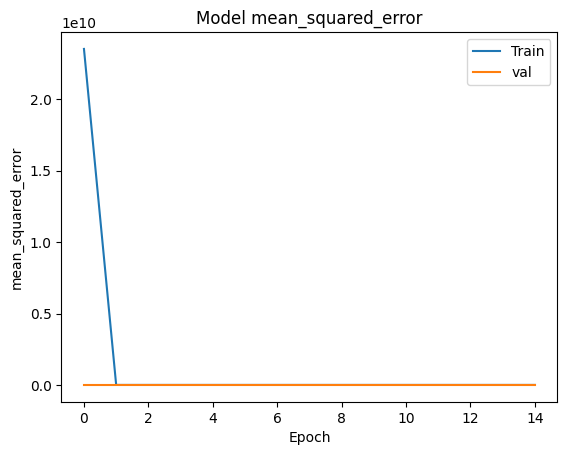

In [12]:
# evaluate the model
def plot_history(history):
    # Plot training & validation accuracy values
    
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['val_mean_squared_error'])
    plt.title('Model mean_squared_error')
    plt.ylabel('mean_squared_error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'])
    plt.show()
plot_history(history)


# Section 4 : Testing 

Simple Models: 1) Taxi_Fare SGD_PREDICTOR



In [98]:
# Start the metrics for evaluating the model performance for the Taxi fare predictor
l1_1=mean_absolute_error(y1_test,predictions)

l2_1=mean_squared_error(y1_test,predictions)

l3_1=r2_score(y1_test,predictions)

print(f'the mean_absolute_error:={l1_1}, the mean_squared_error:={l2_1} and the r2_score:={l3_1}')


the mean_absolute_error:=0.12999115746730683, the mean_squared_error:=0.03824637121224301 and the r2_score:=0.9527853183335587


In [ ]:
l1=mean_absolute_error(y1_val,y1_pred)

l2=mean_squared_error(y1_val,y1_pred)

l3=r2_score(y1_val,y1_pred)

print(f'the mean_absolute_error:={l1}, the mean_squared_error:={l2} and the r2_score:={l3}')


In [89]:
l1_rfr=mean_absolute_error(y1_val,rfr_pred)
l2_rfr=mean_squared_error(y1_val, rfr_pred)
l3_rfr=r2_score(y1_val, rfr_pred)

print(f'the mean_absolute_error:={l1_rfr}, the mean_squared_error:={l2_rfr} and the r2_score:={l3_rfr}')

the mean_absolute_error:=0.13893916319524394, the mean_squared_error:=0.05745845716485483 and the r2_score:=0.9324117163166552


In [ ]:
l1_xgb=mean_absolute_error(y2_val,y_xgboost_predicted)
l2_xgb=mean_squared_error(y2_val,y_xgboost_predicted)
l3_xgb=r2_score(y2_val,y_xgboost_predicted)

print(f'the mean_absolute_error:={l1_xgb}, the mean_squared_error:={l2_xgb} and the r2_score:={l3_xgb}')

the mean_absolute_error:=0.22175367672939164, the mean_squared_error:=0.10785989630678003 and the r2_score:=0.8783374880672596


In [94]:
l1_xgb2=mean_absolute_error(y1_val,xgb_fare_pred)
l2_xgb2=mean_squared_error(y1_val,xgb_fare_pred)
l3_xgb2=r2_score(y1_val,xgb_fare_pred)

print(f'the mean_absolute_error:={l1_xgb2}, the mean_squared_error:={l2_xgb2} and the r2_score:={l3_xgb2}')

the mean_absolute_error:=0.16142699833181196, the mean_squared_error:=0.07183204786642744 and the r2_score:=0.915504086459855
